### 다항회귀
- 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표형된 것
- 다항(Polynomial) 회귀
- 다항회귀는 비선형회귀가 아닌, 선형회귀
- 회귀에서 선형 회귀 / 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따라 다른 것이지 독립변수의 선형/비선형 여부와는 상관 없음
- 다항 회귀 (Polynomial Regression): 종속 변수와 독립 변수 간의 비선형 관계를 다항식 형태로 모델링하는 방법
- 다변량 다항 회귀 (Multivariate Polynomial Regression): 여러 개의 독립 변수와 그들의 다항 항을 포함하여 종속 변수와의 관계를 모델링하는 방법
- 다항회귀는 과적합이 될 수 있으므로 규제가 필요하다.

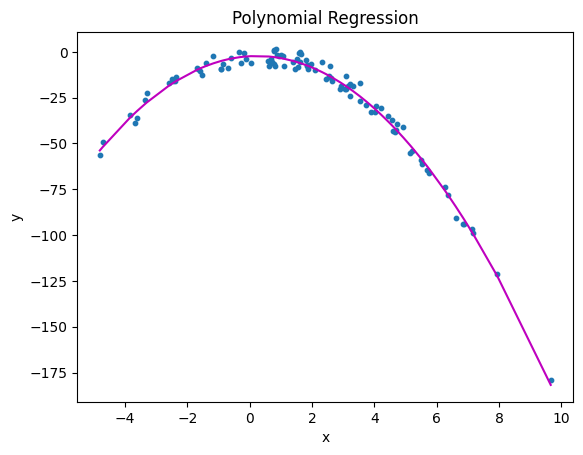

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + np.random.normal(-3, 3, 100)

# 다항 회귀 모델 생성
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# 시각화
plt.scatter(x, y, s=10)
plt.plot(np.sort(x), y_poly_pred[np.argsort(x)], color='m')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()


### 다중회귀
- 다중회귀는 하나의 종속 변수와 둘 이상의 독립 변수 간의 관계를 분석하는 회귀분석
- 독립변수들간의 다중공선성 (Multicollinearity)는 불안정성을 초래할 수 있음
- VIF(Variance Inflation Factor)를 사용하여 다중공선성을 진단

Intercept: 2.8826388569779233
Coefficients: [2.53172401 4.54427425 0.96797504 1.36127321 0.08556654]
Mean Squared Error: 0.2044643315072242
R^2 Score: 0.9408932831745956


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


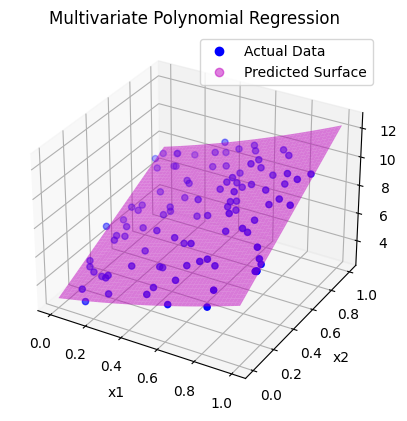

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
np.random.seed(0)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
y = 3 + 2 * x1 + 4 * x2 + 1.5 * x1**2 + 0.5 * x2**2 + 2 * x1 * x2 + np.random.normal(0, 0.5, 100)

# 데이터프레임 생성
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# 독립 변수와 종속 변수 분리
X = df[['x1', 'x2']]
y = df['y']

# 다항 특성 생성
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X)

# 다항 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_poly, y)

# 회귀 계수 출력
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# 예측
y_poly_pred = model.predict(X_poly)

# 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y, y_poly_pred))
print('R^2 Score:', r2_score(y, y_poly_pred))

# 시각화 (2차원 공간에서의 예측 시각화)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 실제 데이터
scat = ax.scatter(df['x1'], df['x2'], df['y'], color='b', label='Actual Data')

# 예측값 시각화
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_grid_poly = polynomial_features.transform(np.column_stack([x1_grid.ravel(), x2_grid.ravel()]))
y_grid_pred = model.predict(X_grid_poly).reshape(x1_grid.shape)

# 예측 표면
surf = ax.plot_surface(x1_grid, x2_grid, y_grid_pred, color='m', alpha=0.5)

# 축 레이블
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Multivariate Polynomial Regression')

# 범례 추가
actual_proxy = plt.Line2D([0], [0], linestyle="none", marker='o', color='b')
predicted_proxy = plt.Line2D([0], [0], linestyle="none", marker='o', color='m', alpha=0.5)
ax.legend([actual_proxy, predicted_proxy], ['Actual Data', 'Predicted Surface'], numpoints=1)

plt.show()

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 캘리포니아 주택 가격 데이터 로드
california = fetch_california_housing()

# 데이터프레임 생성
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target


### 단순한 선형회귀를 통해
- MSE, MAE, R2, OLS 비교하기

### 다항회귀 2차식으로 진행하게 된다면?
- MSE, MAE, R2, OLS 같이 비교하기!


In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
#MedHouseVal y값
#MedInc 수입의 중앙값


## 단순 선형회귀 분석을 진행

X = df[['MedInc']]
y = df['MedHouseVal']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
## 단순선형회귀
linear_model =LinearRegression()
linear_model.fit(X_trian, y_train)
y_pred_linear = linear_model.predict(X_test) #예측값이 출력

## OLS 분석
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
ols_model = sm.OLS(y_train,X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)


##평가지표를 불러오기

mse_linear =mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ols_linear = mean_squared_error(y_test, y_pred_ols)
r2_ols_linear = r2_score(y_test, y_pred_ols)


In [ ]:
#ols, sklearn 동일한 값이 출력
print(mse_linear)
print(mse_ols_linear)

0.7282634839897112
0.7282634839897112


In [ ]:
print(r2_linear)
print(r2_ols_linear)

0.45589490363155005
0.45589490363155005


In [ ]:
#다항회귀 추가
poly_features =PolynomialFeatures(degree=2) #다항회귀 차수 지정
X_train_poly =poly_features.fit_transform(X_train) # 2차 다항식으로 변환하여 학습
X_test_poly = poly_features.transform(np.array(X_test).reshape(-1,1))# 자료타입으로 인한 에러가 발생할 수 있음, 버전으로도 발생할 수 있음

#2차식으로 바꾼 데이터를 학습
poly_model =LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly) #예측값이 출력 2차항으로


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
##2차 다항식 평가지표
##평가지표를 불러오기

mse_poly =mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [ ]:
## 단순선형회귀
print(mse_linear)
print(r2_linear)
print('--------------')
# 2차 다항식으로
print(mse_poly)
print(r2_poly)

0.7282634839897112
0.45589490363155005
--------------
0.7213852414555748
0.46103382230474643


- 성능에서는 다항식이 조금 더 좋은 성능을 보였다.
- 과적합이 될 확률이 높기 때문에 규제에 대한 부분도 고려해야 한다.

In [ ]:
poly_ols_model=sm.OLS(y_train, X_train_poly).fit()

In [ ]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 1.511e+04
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:20:55   Log-Likelihood:                -20418.
No. Observations:               16512   AIC:                         4.084e+04
Df Residuals:                   16510   BIC:                         4.086e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4405      0.015     29.939      0.000       0.412       0.469
MedInc         0.4200      0.003    122.907      0.000       0.413       0.427
==============================================================================
Omnibus:                     3394.115   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7441.567
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.274   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
poly_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     7688.
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:21:56   Log-Likelihood:                -20348.
No. Observations:               16512   AIC:                         4.070e+04
Df Residuals:                   16509   BIC:                         4.072e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1965      0.025      7.793      0.000       0.147       0.246
x1             0.5329      0.010     52.816      0.000       0.513       0.553
x2            -0.0104      0.001    -11.891      0.000      -0.012      -0.009
==============================================================================
Omnibus:                     3375.164   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7283.094
Skew:                           1.189   Prob(JB):                         0.00
Kurtosis:                       5.221   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 피처를 2개 이상 사용하게 된다면?
- 그랬을 때 성능에 대해서 확인해 보자!

In [ ]:
#2개의 피처를 선택
#2개의 피처 기준은 피처셀렉션을 통해 선정하여 2개를 추가해서 다중회귀로 분석해 보자!
X=df[['MedInc','AveRooms']]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
X_test

,MedInc,AveRooms
4585,1.4904,1.598131
2597,2.0644,5.763285
9477,3.5880,5.803758
12020,3.6979,4.771341
6114,3.1597,4.237647
...,...,...
18720,2.4079,4.035853
8640,5.2276,4.814921
11826,4.8051,5.857143
12006,5.1695,7.299229


In [ ]:
## 다중회귀학습
multiple_model =LinearRegression()
multiple_model.fit(X_train, y_train) # 독립변수가 2개 이상인 값이 들어가는 것
y_pred_multiple = multiple_model.predict(X_test) #예측값이 출력

In [ ]:
## 다중회귀로 진행했을 때 , 2개의 피처 사용

mse_multiple =mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

In [ ]:
print(mse_multiple)
print(r2_multiple)

0.7154473365884868
0.46547018959620234


In [ ]:
## 단순선형회귀
print(mse_linear)
print(r2_linear)
print('--------------')
# 2차 다항식으로
print(mse_poly)
print(r2_poly)

0.7282634839897112
0.45589490363155005
--------------
0.7213852414555748
0.46103382230474643


- 피처를 추가하면서 성능과 R2 의 값이 더 올라갔다. (좋아짐)
- 어떤 피처를 추가하는가에 따라 이 성능은 떨어질 수도 있다.
- 이 피처가 스케일링 자체는 하지 않았다.
- 피처 자체가 연속적인 것인지 잘 확인해야 한다.
- 피처가 많고 다항회귀 하면 더 좋은 성능을 만든다 라고 1차원적으로 생각할 순 없다.
- 해당 모델을 가지고 예측을 해야 한다.

In [ ]:
multiple_ols_model=sm.OLS(y_train, X_train).fit()

In [ ]:
multiple_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                          5.492e+04
Date:                Sun, 30 Jun 2024   Prob (F-statistic):                        0.00
Time:                        18:31:07   Log-Likelihood:                         -20834.
No. Observations:               16512   AIC:                                  4.167e+04
Df Residuals:                   16510   BIC:                                  4.169e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4942      0.003    157.877      0.000       0.488       0.500
AveRooms       0.0145      0.002      6.487      0.000       0.010       0.019
==============================================================================
Omnibus:                     2957.187   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7182.912
Skew:                           1.006   Prob(JB):                         0.00
Kurtosis:                       5.529   Cond. No.                         4.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""